# Sklearn
## imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

 ## load Data

In [ ]:
seed =1234
XDf=  pd.read_csv('banco1.csv',index_col=0)
XDf =XDf.fillna(-9)
XDf.iloc[:,2:19] = XDf.iloc[:,2:19].astype('object')
XDf.sexo[XDf.sexo=='Feminino'] = 0
XDf.sexo[XDf.sexo=='Masculino'] = 1
XDf.sexo = XDf.sexo.astype('int64')
XDf['sexo_miss'] = XDf['sexo']
XDf.sexo_miss[XDf.sexo==-9] = 1
XDf.sexo_miss[XDf.sexo!=-9] = 0
XDf.sexo[XDf.sexo==-9] = 0
XDf['tamanhoCabe_miss'] = XDf['tamanhoCabe']
XDf.tamanhoCabe_miss[XDf.tamanhoCabe==-9] = 1
XDf.tamanhoCabe_miss[XDf.tamanhoCabe!=-9] = 0
XDf.tamanhoCabe[XDf.tamanhoCabe==-9] = 32
XDf.tamanhoCabe = XDf.tamanhoCabe.astype('int64')
XDf.tamanhoCabe_miss = XDf.tamanhoCabe_miss.astype('int64')
classFeto = XDf.classFeto.astype('object')
classFeto_miss = classFeto.copy()
classFeto[classFeto=='Termo'] = 1
classFeto_miss[classFeto_miss!=-9]= 0
classFeto_miss[classFeto_miss==-9] = 1
classFeto[classFeto=='Pré-Termo'] = 0
classFeto[classFeto=='Pós-Termo'] = 2
classFeto[classFeto==-9]=0
XDf.classFeto = classFeto.astype('int64')
XDf['classFeto_miss'] = classFeto_miss.astype('int64')
del classFeto
del classFeto_miss
micro = XDf.micro
micro_miss = micro.copy()
micro[micro==-9] = 0
XDf.micro = micro.astype('int64')
del micro
micro_miss[micro_miss!=-9] =0
micro_miss[micro_miss==-9] = 1
XDf['micro_miss'] = micro_miss.astype('int64')
del micro_miss
del XDf['NV_TC_MICRO']
del XDf['NV_Storch']
del XDf['NV_sifilis']
del XDf['count_storch']
del XDf['NV_TOXO']
del XDf['NV_CMV']
del XDf['NV_DENGUE']
del XDf['NV_CHIK']
del XDf['NV_USG_MICRO']
del XDf['NV_RM_MICRO']
del XDf['NV_USG_RESULT']
del XDf['NV_TC_RESULT']
del XDf['NV_RM_RESULT']
del XDf['missImagem']
XDf=XDf[['sexo','sexo_miss','tamanhoCabe','tamanhoCabe_miss','classFeto','classFeto_miss','micro','micro_miss','casegr']]
YDf = XDf.casegr
del XDf['casegr']
Y = np.array(YDf)

X = np.array(XDf)
Y[Y!='Discarded']=1
Y[Y=='Discarded'] = 0
Y=Y.astype(int)
X2 = MinMaxScaler().fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=seed)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y,test_size=0.2,random_state=seed)

# Classify Group1
## KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [8]:
param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'n_neighbors': 3}

In [9]:
modelo_KNN = KNeighborsClassifier(n_neighbors=3)
res_KNN = cross_val_score(modelo_KNN,x2_train,y2_train,cv=10)
res_KNN.mean(),res_KNN.std(),res_KNN.min(),res_KNN.max()

(0.77012987012987, 0.09218238375207732, 0.5909090909090909, 0.9090909090909091)

## CART

In [10]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[15,16,17,18,19,20,21,22,23,24,25,26]}
CART = DecisionTreeClassifier()
grid = GridSearchCV(CART,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': None, 'min_samples_split': 20}

In [11]:
modelo_CART = DecisionTreeClassifier(max_depth=None,min_samples_split=20)
res_CART = cross_val_score(modelo_CART,x2_train,y2_train,cv=10)
res_CART.mean(),res_CART.std(),res_CART.min(),res_CART.max()

(0.8162337662337661,
 0.052579584746793126,
 0.7727272727272727,
 0.9090909090909091)

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [13]:
param ={'min_samples_split':[20,30,40,50,60,100],'max_depth':[None,2,4,5,6,7,8,9,10,15]}
RF = RandomForestClassifier(random_state=seed)
grid = GridSearchCV(RF,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': 5, 'min_samples_split': 40}

In [14]:
modelo_RF = RandomForestClassifier(min_samples_split=40,max_depth=5,random_state=seed)
res_RF = cross_val_score(modelo_RF,x_train,y_train,cv=10)
res_RF.mean(),res_RF.std(),res_RF.min(),res_RF.max()

(0.8344155844155845,
 0.054019400338219295,
 0.7727272727272727,
 0.9090909090909091)

In [15]:
modelo_RF.fit(x_train,y_train)
ypred = modelo_RF.predict(x_test)
res = classification_report(y_test,ypred)

In [16]:
print(res)
ypred = ypred+1
pd.crosstab(ypred,y_test)


              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.77      0.50      0.61        20

    accuracy                           0.76        55
   macro avg       0.77      0.71      0.72        55
weighted avg       0.76      0.76      0.75        55



col_0,0,1
row_0,,
1,32,10
2,3,10


## AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

param ={'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,1.5,2]}
Ada = AdaBoostClassifier(random_state=seed)
grid = GridSearchCV(Ada,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'learning_rate': 0.1}

In [18]:
modelo_Ada = AdaBoostClassifier(learning_rate=0.1,random_state=seed)
res_Ada = cross_val_score(modelo_Ada,x2_train,y2_train,cv=10)
res_Ada.mean(),res_Ada.std(),res_Ada.min(),res_Ada.max()

(0.8164502164502165,
 0.08537472642545062,
 0.6363636363636364,
 0.9047619047619048)

## Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

param = {'max_depth':[2,3,4,5,8,10,15],'min_samples_split':[2,4,5,6,8,10,20,30,40]}
GB = GradientBoostingClassifier(random_state=seed)
grid = GridSearchCV(GB,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': 2, 'min_samples_split': 40}

In [20]:
modelo_GB = GradientBoostingClassifier(max_depth=2,min_samples_split=40,random_state=seed)
res_GB = cross_val_score(modelo_GB,x2_train,y2_train,cv=10)
res_GB.mean(),res_GB.std(),res_GB.min(),res_GB.max()

(0.8164502164502165,
 0.0877614212095292,
 0.6363636363636364,
 0.9090909090909091)

### roc curve

In [21]:
from sklearn.metrics import roc_curve, auc,plot_roc_curve ,classification_report

In [22]:
modelo_RF = RandomForestClassifier(min_samples_split=40,max_depth=5,random_state=seed)
modelo_RF.fit(x2_train,y2_train)
modelo_KNN = KNeighborsClassifier(n_neighbors=3)
modelo_KNN.fit(x2_train,y2_train)
modelo_CART = DecisionTreeClassifier(max_depth=None,min_samples_split=20)
modelo_CART.fit(x2_train,y2_train)
modelo_Ada = AdaBoostClassifier(learning_rate=0.1,random_state=seed)
modelo_Ada.fit(x2_train,y2_train)
modelo_GB = GradientBoostingClassifier(max_depth=2,min_samples_split=40,random_state=seed)
modelo_GB.fit(x2_train,y2_train)

GradientBoostingClassifier(max_depth=2, min_samples_split=40, random_state=1234)

<Figure size 432x288 with 0 Axes>

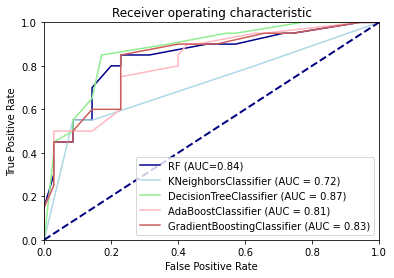

In [23]:
plt.figure()
fig =plot_roc_curve(modelo_RF,x2_test,y2_test,color='darkblue',label="RF (AUC=0.84)")

#fig =plot_roc_curve(modelo_KNN,x2_test,y2_test,color='lightblue',ax=fig.ax_, label="KNN (AUC=0.72)")
fig =plot_roc_curve(modelo_KNN,x2_test,y2_test,color='lightblue',ax=fig.ax_)
fig =plot_roc_curve(modelo_CART,x2_test,y2_test,color='lightgreen',ax=fig.ax_)
fig =plot_roc_curve(modelo_Ada,x2_test,y2_test,color='lightpink',ax=fig.ax_)
fig =plot_roc_curve(modelo_GB,x2_test,y2_test,color='indianred',ax=fig.ax_)
#fig =plot_roc_curve(modelo_CART,x2_test,y2_test,color='lightgreen',ax=fig.ax_, label="CART (AUC=0.87)")
#fig =plot_roc_curve(modelo_Ada,x2_test,y2_test,color='lightpink',ax=fig.ax_, label="AdaBoost (AUC=0.81)")
#fig =plot_roc_curve(modelo_GB,x2_test,y2_test,color='indianred',ax=fig.ax_, label="GB (AUC=0.83)")
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('fig2',dpi=100)
plt.show()


In [24]:
y2_pred=modelo_RF.predict(x2_test)
print(classification_report(y2_test,y2_pred))
pd.crosstab(y2_test,y2_pred)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.77      0.50      0.61        20

    accuracy                           0.76        55
   macro avg       0.77      0.71      0.72        55
weighted avg       0.76      0.76      0.75        55



col_0,0,1
row_0,,
0,32,3
1,10,10


# Classify Group 2
## load data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
import unidecode
import string
#import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.model_selection import train_test_split
import pickle as pk
from sklearn.preprocessing import MinMaxScaler
#import arff

seed =1234
banco = pd.read_csv('banco2.csv',index_col=0)
banco =banco.fillna(-9)
banco.sexo[banco.sexo=='Não Informado'] = -9
banco.sexo[banco.sexo=='Ignorado'] = -9
banco['sexo_miss'] = banco.sexo.copy()
banco.sexo_miss[banco.sexo_miss!=-9] = 0
banco.sexo_miss[banco.sexo_miss==-9] = 1
banco.sexo[banco.sexo==-9] = 0
banco.sexo[banco.sexo=='Feminino'] = 0
banco.sexo[banco.sexo=='Masculino'] = 1
#tamanhoCabe
banco['tamanhoCabe_miss'] = banco.tamanhoCabe.copy()
banco.tamanhoCabe_miss[banco.tamanhoCabe_miss!=-9] = 0
banco.tamanhoCabe_miss[banco.tamanhoCabe_miss==-9] = 1
banco.tamanhoCabe[banco.tamanhoCabe==-9] = 32
#classFeto
banco['classFeto_miss']=banco.classFeto.copy()
banco.classFeto[banco.classFeto=='Termo'] = 1
banco.classFeto[banco.classFeto=='Pré-Termo'] = 0
banco.classFeto[banco.classFeto=='Pós-Termo'] = 2
banco.classFeto[banco.classFeto=='Não se aplica'] = 1
banco.classFeto_miss[banco.classFeto_miss!="Não se aplica"] =0
banco.classFeto_miss[banco.classFeto_miss=="Não se aplica"] =1
#micro
banco['micro_miss'] = banco.micro.copy()
banco.micro[banco.micro==-9] = 0
banco.micro_miss[banco.micro_miss!=-9]=0
banco.micro_miss[banco.micro_miss==-9]=1
#NV_TC_MICRO
banco.NV_TC_MICRO[banco.NV_TC_MICRO=='SIM'] = 1
banco.NV_TC_MICRO[banco.NV_TC_MICRO==-9] = 0
#NV_Storch
banco.NV_Storch[banco.NV_Storch=='4.Não fez nenhum exame para STRC'] = -9
banco.NV_Storch[banco.NV_Storch=='2.Negativo para todos os STRC'] = 0
banco.NV_Storch[banco.NV_Storch=='3.Negativo para 1-3 STRC'] = 1
banco.NV_Storch[banco.NV_Storch=='1.Positivo para pelo menos 1 STRC'] = 2
banco['NV_Storch_miss'] = banco.NV_Storch.copy()
banco.NV_Storch_miss[banco.NV_Storch_miss!=-9] = 0
banco.NV_Storch_miss[banco.NV_Storch_miss==-9] = 1
banco.NV_Storch[banco.NV_Storch==-9] = 1
#NV_sifilis
banco['NV_sifilis_miss'] = banco.NV_sifilis.copy()
banco.NV_sifilis_miss[banco.NV_sifilis_miss!=-9] = 0
banco.NV_sifilis_miss[banco.NV_sifilis_miss==-9] = 1
banco.NV_sifilis[banco.NV_sifilis==-9]=0
banco.NV_sifilis[banco.NV_sifilis=='NR']=0
banco.NV_sifilis[banco.NV_sifilis=='Reagente']=1
#NV_TOXO
banco['NV_TOXO_miss'] = banco.NV_TOXO.copy()
banco.NV_TOXO_miss[banco.NV_TOXO_miss!=-9] = 0
banco.NV_TOXO_miss[banco.NV_TOXO_miss==-9] = 1
banco.NV_TOXO[banco.NV_TOXO==-9]=0
banco.NV_TOXO[banco.NV_TOXO=='NR']=0
banco.NV_TOXO[banco.NV_TOXO=='IgG reagente']=1
#NV_CMV
banco['NV_CMV_miss'] = banco.NV_CMV.copy()
banco.NV_CMV_miss[banco.NV_CMV_miss!=-9] = 0
banco.NV_CMV_miss[banco.NV_CMV_miss==-9] = 1
banco.NV_CMV[banco.NV_CMV==-9]=1
banco.NV_CMV[banco.NV_CMV=='NR']=0
banco.NV_CMV[banco.NV_CMV=='IgG reagente']=1
#NV_DENGUE
banco['NV_DENGUE_miss'] = banco.NV_DENGUE.copy()
banco.NV_DENGUE_miss[banco.NV_DENGUE_miss!=-9] = 0
banco.NV_DENGUE_miss[banco.NV_DENGUE_miss==-9] = 1
banco.NV_DENGUE[banco.NV_DENGUE==-9]=0
banco.NV_DENGUE[banco.NV_DENGUE=='NR']=0
banco.NV_DENGUE[banco.NV_DENGUE=='IgG reagente']=1
banco.NV_DENGUE[banco.NV_DENGUE=='IgM reagente']=2
#NV_CHIK
banco.NV_CHIK[banco.NV_CHIK==-9]=0
banco.NV_CHIK[banco.NV_CHIK=='NR']=1
del banco['count_storch']
#NV_USG_MICRO
banco.NV_USG_MICRO[banco.NV_USG_MICRO==-9]=0
banco.NV_USG_MICRO[banco.NV_USG_MICRO=='SIM']=1
#NV_RM_MICRO
banco.NV_RM_MICRO[banco.NV_RM_MICRO==-9]=0
banco.NV_RM_MICRO[banco.NV_RM_MICRO=='SIM']=1
#NV_USG_RESULT
banco['NV_USG_RESULT_miss'] = banco.NV_USG_RESULT.copy()
banco.NV_USG_RESULT_miss[banco.NV_USG_RESULT_miss!=-9] = 0
banco.NV_USG_RESULT_miss[banco.NV_USG_RESULT_miss==-9] = 1
banco.NV_USG_RESULT[banco.NV_USG_RESULT==-9]=0
banco.NV_USG_RESULT[banco.NV_USG_RESULT=='Normal']=0
banco.NV_USG_RESULT[banco.NV_USG_RESULT=='Indeterminado']=1
banco.NV_USG_RESULT[banco.NV_USG_RESULT=='Alterado']=2
#NV_TC_RESULT
banco['NV_TC_RESULT_miss'] = banco.NV_TC_RESULT.copy()
banco.NV_TC_RESULT_miss[banco.NV_TC_RESULT_miss!=-9] = 0
banco.NV_TC_RESULT_miss[banco.NV_TC_RESULT_miss==-9] = 1
banco.NV_TC_RESULT[banco.NV_TC_RESULT==-9]=1
banco.NV_TC_RESULT[banco.NV_TC_RESULT=='Indeterminado']=0
banco.NV_TC_RESULT[banco.NV_TC_RESULT=='Alterado']=1
#NV_RM_RESULT
banco['NV_RM_RESULT_miss'] = banco.NV_RM_RESULT.copy()
banco.NV_RM_RESULT_miss[banco.NV_RM_RESULT_miss!=-9] = 0
banco.NV_RM_RESULT_miss[banco.NV_RM_RESULT_miss==-9] = 1
banco.NV_RM_RESULT[banco.NV_RM_RESULT==-9]=1
banco.NV_RM_RESULT[banco.NV_RM_RESULT=='Indeterminado']=0
banco.NV_RM_RESULT[banco.NV_RM_RESULT=='Alterado']=1
#missImagem
banco.missImagem[banco.missImagem==-9]=0
#casegr
banco.casegr[banco.casegr=='Discarded']=0
banco.casegr[banco.casegr=='Somewhat probable']=1
banco.casegr[banco.casegr=='Moderately probable']=2
banco.casegr[banco.casegr=='Highly probable']=3
#ordenar
banco = banco[['sexo','sexo_miss', 'tamanhoCabe', 'tamanhoCabe_miss', 'classFeto', 'classFeto_miss', 'micro', 'micro_miss', 'NV_TC_MICRO', 'NV_Storch','NV_Storch_miss','NV_sifilis', 'NV_sifilis_miss', 'NV_TOXO', 'NV_TOXO_miss', 'NV_CMV', 'NV_CMV_miss', 'NV_DENGUE','NV_DENGUE_miss', 'NV_CHIK','NV_USG_MICRO', 'NV_RM_MICRO', 'NV_USG_RESULT', 'NV_USG_RESULT_miss', 'NV_TC_RESULT', 'NV_TC_RESULT_miss','NV_RM_RESULT','NV_RM_RESULT_miss', 'missImagem', 'casegr', 'classFinal', 'texto']]
def similar(tex,mapa):
    tex = unidecode.unidecode(tex)
    
    if tex in mapa:
        tex = mapa[tex]
    return tex 
def extrair(tex,mapa,ponto):
    token = nlp(tex)
    doc = token
    token = [word for word in token if word.like_num==False]
    token = [word.lemma_.lower().strip() if word.lemma_ != "-PRO-" else word.lower_ for word in token]
    token = [word for word in token if similar(word,mapa) not in stopPalavras and word not in ponto]
    token = [similar(word,mapa) for word in token]
    return token, doc
mapa = {
        'atild':'atilde','apoptose':'reducao','antihvc':'hcv','antihtlv':'htlv','antihiv':'hiv','antihcv':'hcv','aghbs':'hbs','antihbs':'hbs','anti':'anticorpo','anteriormente':'anterior','anteceder':'anterior','antecedente':'anterior','ant':'anterior','anencefalia':'anencefalo','anamalia':'anormal','anormalidade':'anormal','anomalidade':'anormal','anomalia':'anormal','amni':'amniotico','aminiotico':'amniotico','ambulatorio':'ambulatorial','altracoe':'anormal','altercoes':'anormal','aintihcv':'hcv','abdomen':'abdome','abdominal':'abdome','abortar':'aborto','abaixar':'abaixo','acentuacao':'acentuada','acentuar':'acentuada','acentuda':'acentuada','agenesia':'agnesia','acidar':'acido','administracao':'administrar','adoecimento':'doenca','afilamento':'discreto','agravar':'severo','alteracao':'anormal','alcool':'alcoolismo','alcoolica':'alcoolismo','alcoolicas':'alcoolismo','alcoolico':'alcoolismo','alcoollica':'alcoolismo','aumentar':'crescimento','aumento':'crescimento','agrupar':'agrupadas','alargamento':'crescimento','alta':'acentuada','alto':'acentuada','altas':'acentuada','amniotica':'amniotico','anecoica':'anecoico','anormais':'anormal','arterial':'arteria','arterias':'arteria','assimetrica':'assimetria','assimetrico':'assimetria', 'assimetricos':'assimetria','atrofia':'reducao','atrofiar':'reducao','alteracoes':'alteracao','atrial':'atrio','atrofico':'reducao', 'artra':'artropatia','artralgia':'artropatia','artrogripose':'artropatia','articular':'articulacao','ausente':'ausencia','adelgacamento':'reducao','afrofia':'reducao',
        'bpm':'bcf','bilitest':'bilirrubina','bebido':'beber','bebiba':'beber','barriga':'abdome','baixar':'reducao','baar':'ebv','bilatera':'bilateral','bilaterais':'bilateral','bilateralmente':'bilateral','branca':'branco',
        'cvm':'citomegalovirus','cutis':'cutaneo','cuteneo':'cutaneo','curto':'discreto','cronicas':'cronica','cranio':'cefalico','crak':'crack','contatos':'contato','constatar':'confirmacao','consangu':'consanguinidade','congenito':'congenita','congenitas':'congenita','cong':'congenita','confirmatorio':'confirmacao','comprobatorio':'confirmacao','colecao':'variadas','cmvi':'citomegalovirus','cmvconsta':'citomegalovirus','cmv':'citomegalovirus','citomrgalovirus':'citomegalovirus','citomegalovir':'citomegalovirus','citomegalovi':'citomegalovirus','citomegalosvirus':'citomegalovirus','citomagalovirus':'citomegalovirus','citomeg':'citomegalovirus','circunfer':'circunferencia','circ':'circunferencia','chuikungunya':'chikungunya','chk':'chikungunya','chikungunia':'chikungunya','chikungunha':'chikungunya','chikun':'chikungunya','chiku':'chikungunya','chik':'chikungunya','chicungunya':'chikungunya','cesareo':'cesarea','cerebr':'cerebro','centralizar':'centralizacao','cefalicas':'cefalico','cefalicac':'cefalico','cefalica':'cefalico','cefalecina':'cefalexina','carniana':'cefalico','cardiopatia':'cardiaco','cardiop':'cardiaco','cardiaca':'cardiaco','calficicacoes':'calcificacao','calcificacoesreducao':'calcificacao','calcificacoe':'calcificacao','calcificaco':'calcificacao','calcifi':'calcificacao','calc':'calcificacao','cafalica':'cefalico','cabeca':'cefalico','cabecas':'cefalico','calcificacoes':'calcificacao','calcificar':'calcificacao','calsificacao':'calcificacao','capsular':'capsula','capsulo':'capsula','centrar':'centralizacao','cerebelar':'cerebelo','cerebelarcranio':'cerebelo','cerebrais':'cerebro','cerebral':'cerebro','cerebra':'cerebro', 'circunvolucao':'circunferencia', 'cistica':'cisto','cisticas':'cisto','cistico':'cisto','cistos':'cisto', 'compensataria':'compensatoria','conclusao':'confirmacao','confirmada':'confirmacao','confirmar':'confirmacao','cornar':'corneo','corno':'corneo','cornos':'corneo','corticais':'cortex','cortical':'cortex','corticos':'cortex','corporal':'corpo','craniana':'cranio','craniano':'cranio',
        'duplicidade':'duplo','doer':'dor','doen':'doenca','disturbios':'anormal','disponiveis':'disponivel','dilat':'crescimento','dignostico':'confirmacao','dignosticada':'confirmacao','diferente':'anormal','diarreico':'diarreia','diagnosticas':'diagnostico','diagnosticar':'diagnostico','diagnostica':'diagnostico','diagnostic':'diagnostico','diag':'diagnostico','detectavel':'deteccao','detectar':'deteccao','detec':'deteccao','destruicao':'anormal','desaparecer':'reducao','dengu':'dengue','deng':'dengue','degeneracao':'reducao','deformidade':'anormal','deformar':'anormal','deficit':'reducao','deficiencia':'reducao','dandy':'dandy-walker','dondy':'dandy-walker','walker':'dandy-walker','definidas':'confirmacao','definido':'confirmacao','destaca':'acentuada','determinando':'confirmacao','diametro':'circunferencia','diametros':'circunferencia','difusamente':'difusa','difusas':'difusa','difuso':'difusa','dilatar':'crescimento','dilatacao':'crescimento','dimensoes':'dimensao','diminuido':'reducao','diminuicao':'reducao','discreta':'discreto','discretamente':'discreto','dimorfismo':'dismorfismo','distribuidas':'distribuida','distribuir':'distribuida','delgado':'discreto','desproporcao':'anormal','dilatacao':'crescimento','diminuicao':'reducao','disproporcao':'anormal',
        'excessivo':'severo','exatema':'exantema','exantematima':'exantema','exantematico':'exantema','exantematicas':'exantema','exantematica':'exantema','evidencia':'confirmacao','etiologia':'etiologico','estreito':'discreto','estabelecido':'confirmacao','espont':'espontaneo','espalhar':'esparso','espaco':'esparso','epstein':'ebv','encefalico':'encefalo','ecograficos':'ecografico','ecografia':'ecografico','ecocardioigrama':'ecocardiograma','ecocardiog':'ecocardiograma','ecocardiagrama':'ecocardiograma','ecogenicidade':'ecogenico','elevar':'acentuada','encefalica':'encefalico','encefalo':'encefalico','esq':'esquerdo','esquer':'esquerdo','encefal':'encefalo','encefalico':'encefalo','enchimento':'crescimento','esparsas':'discreto','esquerda':'esquerdo','esquerdar':'esquerdo','estreitamento':'reducao',
        'fumar':'tabaco','fumante':'tabaco','fraco':'discreto','feto2':'fetal','feto1':'fetal','febril':'febre','febrel':'febre','familiar':'familia','falha':'anormal','fechamento':'fechar','fusao':'fechar','face':'facial','feto':'fetal','fissurar':'fissuras','focos':'foco','frontais':'frontal',
        'glicose':'glicemia','glic':'glicemia','gicemia':'glicemia','gestcao':'gestacao','gestacional':'gestacao','gestaca':'gestacao','gestac':'gestacao','gesta':'gestacao','gest':'gestacao','giros':'giro','giral':'giro','grosseiras':'grosseiro',
        'hsag':'hbs','hivs':'hiv','hipoxico':'hipoxia','hipotireioidismo':'hipotireoidismo','hipoplasicas':'hipoplasico','hipertesnao':'hipertensao','hipertenso':'hipertensao','hipertensivo':'hipertensao','hiperextensao':'crescimento','hiperestensao':'crescimento','heterogenea':'heterogeneo','herpes':'hsv','hepb':'hbs','hepatitec':'hcv','hepatiteb':'hbs','hepaptite':'hepatite','hemmorragia':'hemorragia','hemoglobia':'hemoglobina','hematrocrito':'hematocrito','hbc':'hcv','hbshg':'hbs','hbsg':'hbs','hbsag':'hbs','hbcv':'hcv','habitual':'comumente','hemisferios':'hemisferio','hemorragico':'hemorragia','hidroanencefalia':'hidrocefalia','hidranencefalia':'hidrocefalia','hiperecoicos':'hiperecoicas','hipodensa':'hipodensidade','hipoplasia':'reducao','holoprosecefalia':'holoprosencefalia',
        'irritabilida':'irritabilidade','irradiar':'esparso','intrautero':'intrauterino','intrauterinas':'intrauterino','intrauterina':'intrauterino','intracranianas':'intracraniana','intracerebral':'intracraniana','intercorrencias':'intercorrencia','intercorr':'intercorrencia','intenso':'severo','insuficiente':'reducao','insuficiencia':'reducao','infec':'infeccao','inespecificas':'inespecifico','indeterminar':'inderteminado','incomple':'incompleto','incomp':'incompleto','inchaco':'crescimento','implatacao':'implantacao','ilicitas':'ilicito','igm0':'igm','igg10':'igg','identificacao':'confirmacao','icterico':'ictericia','involucao':'reducao','inespecfico':'inespecifico','inespecificos':'inespecifico','inexpecifica':'inespecifico','infecciosa':'infeccao','infeccioso':'infeccao','injuria':'anormal','irregular':'anormal','interior':'interno','isquemica':'isquemico',
        'luxacao':'crescimento','linf':'linfocitos','leuco':'leucocito','leucocitos18':'leucocito','leucocitos':'leucocito','lesao':'anormal','lacerar':'anormal','laterais':'lateral','lisenfalia':'lisencefalia','later':'lateral','lados':'lateral','lineares':'linear','lisencefalias':'lisencefalia','lisencefalicas':'lisencefalia','linha':'linear','lobo':'lobos','lobolos':'lobos','localizar':'localizadas',
        'morfologico':'morfologia','mon':'monocitos','minimo':'reducao','microoftalmia':'microftalmia','microcelafia':'microcefalia','microcefali':'microcefalia','micr':'microcefalia','micro':'microcefalia','micricefalia':'microcefalia','microcalcificacao':'calcificacao','mental':'cognitivo','medicar':'medicamentar','medicamento':'medicamentar','medicacoes':'medicamentar','medicacao':'medicamentar','mediar':'medicacao','mediante':'medicacao','malformaca':'malformacao','malforma':'malformacao','malfor':'malformacao','malfomalcao':'malformacao','magnetico':'rm','magnetica':'rm','macrocalcificacoes':'calcificacao','microcalcificacoes':'calcificacao','microcefalico':'microcefalia','microcrania':'microcefalia','morfas':'morfologico','morfologica':'morfologico','multiplas':'variadas','multiplos':'variadas','multiplo':'variadas',
        'normalidade':'negativo','normalida':'negativo','normal':'negativo','norm':'negativo','nervosoatipico':'nervoso','nenhum':'negativo','negativar':'negativo','negati':'negativo','neg':'negativo','necessarios':'necessitar','necessario':'necessitar','nascido':'nascimento','nascer':'nascimento','nasc':'nascimento','nasal':'nariz','nuclear':'nucleo','nucleos':'nucleo',
        'ovalar':'oval','oligodramnia':'oligodramnio','oligamnio':'oligodramnio','ok':'negativo','oftamologica':'oftalmologia','oftalmologico':'oftalmologia','ocupitais':'occipital','occiptal':'occipital','obstetrico':'obstetrica','obstretica':'obstetrica','obstetri':'obstetrica','obstetra':'obstetrica','occipitais':'occipital','oligoamnio':'oligodramnio','oligodremnia':'oligodramnio',
        'plaq':'plaqueta','purido':'prurir','puerpera':'puerperio','puericultur':'puericultura','pruriginoso':'prurir','proteinas':'proteina','proseguir':'prosseguir','proliferar':'crescimento','presentar':'presenca','preenchimento':'preencher','possuir':'positivo','positivar':'positivo','pos':'positivo','polihidraminia':'polidramnio','persistencia':'persistente','perim':'perimetro','percetil':'percentil','patologico':'anormal','patologia':'anormal','parvo':'parvovirus','parequimatosas':'parenquima','parequima':'parenquima','parenqu':'parenquima','paremica':'parenquima','parametros':'padrao','parametro':'padrao','padr':'padrao','paquigirico':'paquigiria','parcialmente':'discreto','parcial':'discreto','paremquima':'parenquima','parenquimatosas':'parenquima','parenquimatoso':'parenquima','pariental':'parietal','pequenas':'discreto','periventricularaes':'periventricular','periventriculares':'periventricular','podend':'podendo','porcoes':'porcao','predominando':'acentuada','predominio':'acentuada','predominantemente':'acentuada','proeminencia':'acentuada','proeminente':'acentuada','perda':'ausencia','parietais':'parietal','pequena':'discreto','pequeno':'discreto','posteriores':'posterior',
        'quadruplo':'quadruplicar',
        'rinite':'alergico','rgico':'alergico','respiratorio':'respiracao','repetitivo':'repeticao','rubeolar':'rubeolar','rubeolaigm':'rubeola','rub':'rubeola','rubeol':'rubeola','rnm':'rm','rmm':'rm','restri':'restricao','ressonancia':'rm','resist':'resistencia','regante':'positivo','reg':'positivo','redu':'reducao','reativo':'positivo','realizdos':'realizar','realizacao':'realizar','realiz':'realizar','realiozados':'realizar','realiazados':'realizar','reagnete':'positivo','reagentetoxoplasmose':'toxo','reagenstes':'positivo','reagen':'positivo','reag':'positivo','rapidos':'rapido','radiar':'crescimento','reabsorcao':'reducao','regioes':'regiao','reduzir':'reducao','realizada':'realizar','realizou':'realizar','remanescente':'discreto',
        'suspeitar':'suspeito','significativo':'severo','suseptivel':'suscetivel','sucorticais':'subcortical','subcorticais':'subcortical','stoch':'storch','sorologicos':'sorologia','sorologico':'sorologia','sorologai':'sorologia','sorol':'sorologia','sonografico':'ultrasonografia','sonografias':'ultrasonografia','sisilis':'sifilis','sintomatologia':'sintoma','sindromica':'sindrome','sindrmoe':'sindrome','sinalizacao':'sinal','sifili':'sifilis','sifiles':'sifilis','sifiis':'sifilis','scaner':'scanner','sanguineo':'sangue','sinais':'sinal','segmento':'segmentar','seguimento':'segmentar','significativa':'severo','sequelar':'anormal','sequela':'anormal','simetrica':'simetrico','sulcos':'sulco','supratentarial':'supratentorial','supratentoreal':'supratentorial','supratentoriais':'supratentorial',
        'trasnsfontanela':'transfontanela','transfontonela':'transfontanela','transfontene':'transfontanela','transfontanelar':'transfontanela','transfontalena':'transfontanela','transfonta':'transfontanela','transfont':'transfontanela','transfon':'transfontanela','toxoplsmose':'toxo','toxoplasmpose':'toxo','toxoplasmose':'toxo','toxoplasmo':'toxo','toxoplasma':'toxo','toxoplasm':'toxo','toxoplamose':'toxo','toxopla':'toxo','toxiinfeccao':'toxo','tox':'toxo','torch':'storch','toracico':'torax','tomograficos':'tomografia','tomografico':'tomografia','tabagista':'tabaco','tabagismo':'tabaco','talamica':'talamo','talar':'talamo','tenue':'discreto','tenues':'discreto','temporais':'temporal','tentoriais':'temporal','torchs':'torch','torto':'anormal',
        'ustf':'transfontanela','ust':'transfontanela','usgtransfontonela':'transfontanela','usgtf':'transfontanela','usgt':'transfontanela','usgft':'transfontanela','usg':'ultrasonografia','usft':'transfontanela','usf':'ultrasonografia','ultrassons':'ultrasonografia','ultrassonograficos':'ultrasonografia','ultrassonografias':'ultrasonografia','ultrassonografia':'ultrasonografia','ultrassonog':'ultrasonografia','ultrassongrafia':'ultrasonografia','ultrasson':'ultrasonografia','ultrassom':'ultrasonografia','ultrasso':'ultrasonografia','ultrasonografias':'ultrasonografia','ultrasom':'ultrasonografia','ultras':'ultrasonografia',
        'virose':'virus','viral':'virus','ventroculomegalia':'ventriculomegalia','ventriculomagalia':'ventriculomegalia','vasoculopatia':'vasculopatia','variar':'variadas','varginal':'vagina','vaginal':'vagina','vacinal':'vacinar','variante':'variadas','ventricomegalia':'ventriculomegalia','ventricular':'ventriculo','ventriculos':'ventriculo','venix':'vermix','vermis':'vermix','vernix':'vermix','vasculopatias':'vasoculopatia','ventriculomagele':'ventroculomegalia','ventriculomegalia':'ventroculomegalia','ventricumegalia':'ventroculomegalia','ventriculomegalia':'ventroculomegalia','ventroculomegalia':'ventriculomegalia','volumar':'volume','volumetrica':'volume','volumetrico':'volume',
        'walter':'dandy-walker',
        'zikavirus':'zika','zica':'zika','zi':'zika'
        }


nlp = spacy.load("pt_core_news_sm")
ponto = string.punctuation
stopPalavras = list(STOP_WORDS)
stopPalavras.append("06h")
stopPalavras.append("07h")
stopPalavras.append("0a")
stopPalavras.append("10dias")
stopPalavras.append("10ui")
stopPalavras.append("110x70")
stopPalavras.append("12d")
stopPalavras.append("12s")
stopPalavras.append("13s")
stopPalavras.append("14sm")
stopPalavras.append("15sm")
stopPalavras.append("17h")
stopPalavras.append("18s")
stopPalavras.append("1dia")
stopPalavras.append("1gg")
stopPalavras.append("1gm")
stopPalavras.append("1odose")
stopPalavras.append("1ot")
stopPalavras.append("200ui")
stopPalavras.append("200x190")
stopPalavras.append("20150vdrl")
stopPalavras.append("20mcg")
stopPalavras.append("20s")
stopPalavras.append("20s6d")
stopPalavras.append("21dp")
stopPalavras.append("21sm")
stopPalavras.append("22s")
stopPalavras.append("23s")
stopPalavras.append("23sm")
stopPalavras.append("24h")
stopPalavras.append("25s")
stopPalavras.append("26semanas")
stopPalavras.append("28sem")
stopPalavras.append("2d")
stopPalavras.append("2dp")
stopPalavras.append("2sm")
stopPalavras.append("2tri")
stopPalavras.append("30s")
stopPalavras.append("31s")
stopPalavras.append("33sem")
stopPalavras.append("34s")
stopPalavras.append("36s")
stopPalavras.append("36s3d")
stopPalavras.append("36sm")
stopPalavras.append("37s1d")
stopPalavras.append("37s2d")
stopPalavras.append("37s5d")
stopPalavras.append("38oc")
stopPalavras.append("38s1d")
stopPalavras.append("38s")
stopPalavras.append("38sem")
stopPalavras.append("38semanas")
stopPalavras.append("39sm")
stopPalavras.append("39s")
stopPalavras.append("38s")
stopPalavras.append("3omes")
stopPalavras.append("3tri")
stopPalavras.append("48h")
stopPalavras.append("4sm")
stopPalavras.append("51ui")
stopPalavras.append("5ag")
stopPalavras.append("6consultas")
stopPalavras.append("6d")
stopPalavras.append("9797ba")
stopPalavras.append("a0")
stopPalavras.append("aas")
stopPalavras.append("ab")
stopPalavras.append("abar")
stopPalavras.append("abd")
stopPalavras.append("abril")
stopPalavras.append("absag")
stopPalavras.append("ac")
stopPalavras.append("achar")
stopPalavras.append("acirc")
stopPalavras.append("acm")
stopPalavras.append("acolhido")
stopPalavras.append("acolhimento")
stopPalavras.append("acometer")
stopPalavras.append("acompanhamento")
stopPalavras.append("acompanhante")
stopPalavras.append("acompanhar")
stopPalavras.append("adequadamente")
stopPalavras.append("adm")
stopPalavras.append("adm")
stopPalavras.append("admissao")
stopPalavras.append("admissional")
stopPalavras.append("admitir")
stopPalavras.append("aceito")
stopPalavras.append("adequar")
stopPalavras.append("adicionar")
stopPalavras.append("administrar")
stopPalavras.append("adquirir")
stopPalavras.append("af")
stopPalavras.append("afirmar")
stopPalavras.append("ag")
stopPalavras.append("agendar")
stopPalavras.append("agente")
stopPalavras.append("aghabs")
stopPalavras.append("aguardar")
stopPalavras.append("aig")
stopPalavras.append("aina")
stopPalavras.append("a1")
stopPalavras.append("alagoinhas")
stopPalavras.append("albert")
stopPalavras.append('align"justify')
stopPalavras.append('alves')
stopPalavras.append('am')
stopPalavras.append('ambigua')
stopPalavras.append('amostrar')
stopPalavras.append('analisar')
stopPalavras.append('andamento')
stopPalavras.append('anit')
stopPalavras.append('ano')
stopPalavras.append('anotacao')
stopPalavras.append('aometodo')
stopPalavras.append('ap')
stopPalavras.append('aparentar')
stopPalavras.append('apo')
stopPalavras.append('apr')
stopPalavras.append('aprese')
stopPalavras.append('aproximadamente')
stopPalavras.append('arlinda')
stopPalavras.append('ass')
stopPalavras.append('at')
stopPalavras.append('assistencia')
stopPalavras.append('assistente')
stopPalavras.append('atar')
stopPalavras.append('atb')
stopPalavras.append('atendido')
stopPalavras.append('atendimento')
stopPalavras.append('ater')
stopPalavras.append('atrasar')
stopPalavras.append('atravez')
stopPalavras.append('atualizacao')
stopPalavras.append('atualizado')
stopPalavras.append('aume')
stopPalavras.append('aus')
stopPalavras.append('ausentar')
stopPalavras.append('automedicacao')
stopPalavras.append('av')
stopPalavras.append('avaliar')
stopPalavras.append('b')
stopPalavras.append('bebr')
stopPalavras.append('born')
stopPalavras.append('bo')
stopPalavras.append('br')
stopPalavras.append('buscar')
stopPalavras.append('ca27')
stopPalavras.append('ca28')
stopPalavras.append('caber')
stopPalavras.append('caetano')
stopPalavras.append('caf')
stopPalavras.append('camacari')
stopPalavras.append('capibarib')
stopPalavras.append('captar')
stopPalavras.append('caracterizar')
stopPalavras.append('caratcerizada')
stopPalavras.append('caribe')
stopPalavras.append('carlos')
stopPalavras.append('cartao')
stopPalavras.append('carteiro')
stopPalavras.append('casar')
stopPalavras.append('caso')
stopPalavras.append('causar')
stopPalavras.append('chegar')
stopPalavras.append('chorar')
stopPalavras.append('cid')
stopPalavras.append('cidade')
stopPalavras.append('cigarro')
stopPalavras.append('citar')
stopPalavras.append('civil')
stopPalavras.append('clareza')
stopPalavras.append('classificacao')
stopPalavras.append('classificar')
stopPalavras.append('clinicamente')
stopPalavras.append('clinicar')
stopPalavras.append('clinico')
stopPalavras.append('coeficiente')
stopPalavras.append('coleta')
stopPalavras.append('coletadas')
stopPalavras.append('coletado')
stopPalavras.append('coletados')
stopPalavras.append('coletou')
stopPalavras.append('colher')
stopPalavras.append('colhido')
stopPalavras.append('comentario')
stopPalavras.append('comer')
stopPalavras.append('comp')
stopPalavras.append('companheiro')
stopPalavras.append('comparecer')
stopPalavras.append('compensatoria')
stopPalavras.append('compensatorio')
stopPalavras.append('comprimento')
stopPalavras.append('computar')
stopPalavras.append('conhecer')
stopPalavras.append('conjugal')
stopPalavras.append('conjuge')
stopPalavras.append('conseguir')
stopPalavras.append('consumir')
stopPalavras.append('contar')
stopPalavras.append('continuar')
stopPalavras.append('correspondente')
stopPalavras.append('descobrir')
stopPalavras.append('descrever')
stopPalavras.append('descrito')
stopPalavras.append('devidamente')
stopPalavras.append('dia018')
stopPalavras.append('dia16')
stopPalavras.append('diariamente')
stopPalavras.append('dimens')
stopPalavras.append('dimensao')
stopPalavras.append('dirigir')
stopPalavras.append('div')
stopPalavras.append('documento')
stopPalavras.append('dosar')
stopPalavras.append('dose')
stopPalavras.append('doutor')
stopPalavras.append('dr')
stopPalavras.append('duarte')
stopPalavras.append('durar')
stopPalavras.append('duvidar')
stopPalavras.append('efeito')
stopPalavras.append('elisa')
stopPalavras.append('email')
stopPalavras.append('encaminh')
stopPalavras.append('encaminhamento')
stopPalavras.append('encaminhar')
stopPalavras.append('enfermeiro')
stopPalavras.append('engravidar')
stopPalavras.append('ensinar')
stopPalavras.append('entanto')
stopPalavras.append('enviar')
stopPalavras.append('episodio')
stopPalavras.append('epoca')
stopPalavras.append('equipar')
stopPalavras.append('escolaridade')
stopPalavras.append('espacar')
stopPalavras.append('especialmente')
stopPalavras.append('especificar')
stopPalavras.append('esperar')
stopPalavras.append('esquema')
stopPalavras.append('estudo')
stopPalavras.append('etc')
stopPalavras.append('eunapolis')
stopPalavras.append('exam')
stopPalavras.append('expediente')
stopPalavras.append('favorecer')
stopPalavras.append('fem')
stopPalavras.append('feminino')
stopPalavras.append('ficar')
stopPalavras.append('filho')
stopPalavras.append('formular')
stopPalavras.append('freitas')
stopPalavras.append('fundamental')
stopPalavras.append('gilmara')
stopPalavras.append('gravidez')
stopPalavras.append('gravido')
stopPalavras.append('gusmao')
stopPalavras.append('hipotese')
stopPalavras.append('histori')
stopPalavras.append('historia')
stopPalavras.append('historiar')
stopPalavras.append('historico')
stopPalavras.append('hoje')
stopPalavras.append('horar')
stopPalavras.append('hospital')
stopPalavras.append('hospitalar')
stopPalavras.append('hospitalizacao')
stopPalavras.append('idade')
stopPalavras.append('id')
stopPalavras.append('ig18')
stopPalavras.append('ig37')
stopPalavras.append('ig9')
stopPalavras.append('ignorar')
stopPalavras.append('igual')
stopPalavras.append('impressao')
stopPalavras.append('indice')
stopPalavras.append('infectologista')
stopPalavras.append('informacao')
stopPalavras.append('informar')
stopPalavras.append('ingerir')
stopPalavras.append('instituicao')
stopPalavras.append('instituto')
stopPalavras.append('internacao')
stopPalavras.append('internamento')
stopPalavras.append('internar')
stopPalavras.append('investigacao')
stopPalavras.append('investigar')
stopPalavras.append('irar')
stopPalavras.append('irm')
stopPalavras.append('irma')
stopPalavras.append('irmao')
stopPalavras.append('itabaiana')
stopPalavras.append('jaguare')
stopPalavras.append('janeiro')
stopPalavras.append('janine')
stopPalavras.append('joao')
stopPalavras.append('jose')
stopPalavras.append('josy')
stopPalavras.append('julho')
stopPalavras.append('juliete')
stopPalavras.append('junho')
stopPalavras.append('juntamente')
stopPalavras.append('kg')
stopPalavras.append('laboartoriais')
stopPalavras.append('laboratorial')
stopPalavras.append('laboratorias')
stopPalavras.append('laboratorio')
stopPalavras.append('lacen')
stopPalavras.append('lactente')
stopPalavras.append('laudo')
stopPalavras.append('lauro')
stopPalavras.append('lembrar')
stopPalavras.append('levantar')
stopPalavras.append('levar')
stopPalavras.append('like')
stopPalavras.append('m30')
stopPalavras.append('macho')
stopPalavras.append('mail')
stopPalavras.append('maio')
stopPalavras.append('major')
stopPalavras.append('mamao')
stopPalavras.append('maranhao')
stopPalavras.append('marco')
stopPalavras.append('masculino')
stopPalavras.append('materni')
stopPalavras.append('maternidade')
stopPalavras.append('materno')
stopPalavras.append('meireles')
stopPalavras.append('medir')
stopPalavras.append('mensurar')
stopPalavras.append('mencao')
stopPalavras.append('merecer')
stopPalavras.append('mg')
stopPalavras.append('mim')
stopPalavras.append('ml')
stopPalavras.append('mm3')
stopPalavras.append('mmhg')
stopPalavras.append('morador')
stopPalavras.append('mostrar')
stopPalavras.append('municipal')
stopPalavras.append('municipio')
stopPalavras.append('municpal')
stopPalavras.append('mutirao')
stopPalavras.append('nome')
stopPalavras.append('notar')
stopPalavras.append('notfic')
stopPalavras.append('notificacao')
stopPalavras.append('notificar')
stopPalavras.append('noto')
stopPalavras.append('novembro')
stopPalavras.append('nph')
stopPalavras.append('o80')
stopPalavras.append('observacao')
stopPalavras.append('observar')
stopPalavras.append('obter')
stopPalavras.append('obtido')
stopPalavras.append('ocorrer')
stopPalavras.append('odor')
stopPalavras.append('ofertar')
stopPalavras.append('ola')
stopPalavras.append('osvaldo')
stopPalavras.append('outubro')
stopPalavras.append('p')
stopPalavras.append('p0')
stopPalavras.append('p50')
stopPalavras.append('p5915')
stopPalavras.append('p706')
stopPalavras.append('pa')
stopPalavras.append('pai')
stopPalavras.append('paiente')
stopPalavras.append('pantanal')
stopPalavras.append('paraiba')
stopPalavras.append('parceiro')
stopPalavras.append('parecer')
stopPalavras.append('patente')
stopPalavras.append('paulo')
stopPalavras.append('pc')
stopPalavras.append('pedir')
stopPalavras.append('pedriatras')
stopPalavras.append('perceber')
stopPalavras.append('perceptivel')
stopPalavras.append('pereira')
stopPalavras.append('periodo')
stopPalavras.append('permitir')
stopPalavras.append('pescador')
stopPalavras.append('pesquisar')
stopPalavras.append('pessoa')
stopPalavras.append('pessoal')
stopPalavras.append('planilha')
stopPalavras.append('podendo')
stopPalavras.append('policia')
stopPalavras.append('possibilidade')
stopPalavras.append('preescrito')
stopPalavras.append('preferir')
stopPalavras.append('presidiario')
stopPalavras.append('primar')
stopPalavras.append('profissional')
stopPalavras.append('prontuario')
stopPalavras.append('prontuarios')
stopPalavras.append('protocolo')
stopPalavras.append('protuario')
stopPalavras.append('quaestionario')
stopPalavras.append('quantidade')
stopPalavras.append('questionario')
stopPalavras.append('realata')
stopPalavras.append('receber')
stopPalavras.append('recife')
stopPalavras.append('recordar')
stopPalavras.append('registrar')
stopPalavras.append('registro')
stopPalavras.append('relatar')
stopPalavras.append('relato')
stopPalavras.append('relatorio')
stopPalavras.append('revelar')
stopPalavras.append('revisao')
stopPalavras.append('roberto')
stopPalavras.append('sair')
stopPalavras.append('sala')
stopPalavras.append('salvador')
stopPalavras.append('samara')
stopPalavras.append('santo')
stopPalavras.append('secretariar')
stopPalavras.append('secundario')
stopPalavras.append('seguinte')
stopPalavras.append('seguir')
stopPalavras.append('semanal')
stopPalavras.append('semanss')
stopPalavras.append('semestre')
stopPalavras.append('servico')
stopPalavras.append('setembro')
stopPalavras.append('silvar')
stopPalavras.append('silviano')
stopPalavras.append('soicitado')
stopPalavras.append('solange')
stopPalavras.append('soliciotado')
stopPalavras.append('solicitar')
stopPalavras.append('solicitodo')
stopPalavras.append('solteiro')
stopPalavras.append('souza')
stopPalavras.append('sr')
stopPalavras.append('style"font')
stopPalavras.append('sul')
stopPalavras.append('sumario')
stopPalavras.append('resultar')
stopPalavras.append('tecnica')
stopPalavras.append('tecnicamente')
stopPalavras.append('tecnico')
stopPalavras.append('tel')
stopPalavras.append('telefonar')
stopPalavras.append('telefonico')
stopPalavras.append('telefonicos')
stopPalavras.append('testar')
stopPalavras.append('tio')
stopPalavras.append('tornar')
stopPalavras.append('trabalhar')
stopPalavras.append('transcorrer')
stopPalavras.append('transcrever')
stopPalavras.append('transferir')
stopPalavras.append('tratamento')
stopPalavras.append('tratar')
stopPalavras.append('trimestre')
stopPalavras.append('unidade')
stopPalavras.append('universitario')
stopPalavras.append('usuaria')
stopPalavras.append('usuario')
stopPalavras.append('utilizar')
stopPalavras.append('valenca')
stopPalavras.append('vestir')
stopPalavras.append('viagem')
stopPalavras.append('vigilancia')
stopPalavras.append('vir')
stopPalavras.append('visitar')

stopPalavras.append("a")
stopPalavras.append("e")
stopPalavras.append("o")
stopPalavras.append("m")
stopPalavras.append("d")
stopPalavras.append("v")
stopPalavras.append("l")
stopPalavras.append("algum")
stopPalavras.append("apresentando")
stopPalavras.append("apresentar")
stopPalavras.append("aspecto")
stopPalavras.append("aspectos")
stopPalavras.append("associado")
stopPalavras.append("associar")
stopPalavras.append("atual")
stopPalavras.append("avaliacao")
stopPalavras.append("biometria")
stopPalavras.append("aparente")
stopPalavras.append("caracteristico")
stopPalavras.append("caracteriza-se")
stopPalavras.append("caracterizacao")
stopPalavras.append("cm")
stopPalavras.append("compativeis")
stopPalavras.append("compativel")
stopPalavras.append("comunicar")
stopPalavras.append("considerar")
stopPalavras.append("corresponder")
stopPalavras.append("datada")
stopPalavras.append("dezembro")
stopPalavras.append("dia")
stopPalavras.append("especificacao")
stopPalavras.append("havia")
stopPalavras.append("moderar")
stopPalavras.append("provavelmente")
stopPalavras.append("relacionar")
stopPalavras.append("relacionado")
stopPalavras.append("representar")
stopPalavras.append("sugestivo")
stopPalavras.append("umar")
stopPalavras.append("visibilizacao")
stopPalavras.append("visto")
stopPalavras.append("visualizar")
stopPalavras.append("ultima")
stopPalavras.append("unica")
stopPalavras.append("unico")
stopPalavras.append("voluntario")
stopPalavras.append("evidenciar")
stopPalavras.append("exame")
stopPalavras.append("imagem")
stopPalavras.append("indicar")
stopPalavras.append("obs")
stopPalavras.append("sugerimos")
stopPalavras.append("sugerir")
stopPalavras.append("semana")
stopPalavras.append("situacao")
stopPalavras.append("sobretudo")
stopPalavras.append("substanciar")
stopPalavras.append("sugerindo")
stopPalavras.append("assumir")
stopPalavras.append("completar")
stopPalavras.append("derecionado")
stopPalavras.append("durante")
stopPalavras.append("encontrar")
stopPalavras.append("esclarecer")
stopPalavras.append("esperado")
stopPalavras.append("estudar")
stopPalavras.append("evidente")
stopPalavras.append("notadamente")
stopPalavras.append("observam-se")
stopPalavras.append('identificar')
stopPalavras.append('outro')
stopPalavras.append('paciente')
stopPalavras.append('provavel')
stopPalavras = [similar(word,mapa) for word in stopPalavras]
    
texto = banco.texto
texto =texto.tolist()
del banco['classFinal']
YDf = banco.casegr
XDf = banco.copy()
del XDf['casegr']
del XDf['texto']
col = XDf.columns
XDf = MinMaxScaler().fit_transform(XDf)
XDf=pd.DataFrame(XDf)
XDf.columns = col
XDf['texto'] = texto
X_train, X_test,y_train, y_test = train_test_split(XDf, YDf, train_size=0.8,random_state=seed,stratify=YDf)
texto_t = X_train.texto
del X_train['texto']
texto_v = X_test.texto
del X_test['texto']

docs_total= []
docs_t = []
docs_v= []
lista_total = []
lista_t = []
lista_v = []
#total
for t in texto:
    tokens, doc = extrair(t,mapa,ponto)
    docs_total.append(doc)
    lista_total.append(tokens)
#treino
for t in texto_t:
    tokens, doc = extrair(t,mapa,ponto)
    docs_t.append(doc)
    lista_t.append(tokens)
#valida
for t in texto_v:
    tokens, doc = extrair(t,mapa,ponto)
    docs_v.append(doc)
    lista_v.append(tokens)
del doc
del t    
var_total = []
var_t = []
#var_v = []
#total
for tokens in lista_total:
    for p in tokens:
        if p not in var_total:
            var_total.append(p)
#treino
for tokens in lista_t:
    for p in tokens:
        if p not in var_t:
            var_t.append(p)
del tokens
del p
for var in var_t:
    #treinamento
    tam = len(X_train)
    lvar = np.zeros(tam,dtype='int64')
    for i in range(tam):
        if var in lista_t[i]:
            lvar[i] = 1
        else:
            lvar[i] = 0
    aux=var+'_word'
    X_train[aux] = lvar
    #teste
    tam = len(X_test)
    lvar = np.zeros(tam,dtype='int64')
    for i in range(tam):
        if var in lista_v[i]:
            lvar[i] = 1
        else:
            lvar[i] = 0
    X_test[aux] = lvar
print(X_train.sexo.value_counts())
treino = X_train.copy()
teste = X_test.copy()
treino['class'] = y_train.tolist()
teste['class'] = y_test.tolist()
#X_train=np.array(X_train)
#X_train =X_train.astype('float64')
#X_test=np.array(X_test)
#X_test =X_test.astype('float64')
#y_train=np.array(y_train)
#y_train =y_train.astype('int64')
#y_test=np.array(y_test)
#y_test =y_test.astype('int64')
y_train= y_train.astype(int)
y_test= y_test.astype(int)

## KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 7}

In [40]:
modelo_KNN = KNeighborsClassifier(n_neighbors=7)
res_KNN = cross_val_score(modelo_KNN,X_train,y_train,cv=10)
res_KNN.mean(),res_KNN.std(),res_KNN.min(),res_KNN.max()

(0.6990423901940755,
 0.02599100026101647,
 0.651685393258427,
 0.7415730337078652)

## CART

In [30]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[15,16,17,18,19,20,21,22,23,24,25,26]}
CART = DecisionTreeClassifier()
grid = GridSearchCV(CART,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 7, 'min_samples_split': 17}

In [31]:
modelo_CART = DecisionTreeClassifier(max_depth=7,min_samples_split=16)
res_CART = cross_val_score(modelo_CART,X_train,y_train,cv=10)
res_CART.mean(),res_CART.std(),res_CART.min(),res_CART.max()

(0.8173135852911132,
 0.030853246768329796,
 0.7840909090909091,
 0.8764044943820225)

## Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [66]:
param ={'min_samples_split':[2,3,4,6,8,10],'max_depth':[None,2,4,5,6,7,8,9,10,15]}
RF = RandomForestClassifier(random_state=seed)
grid = GridSearchCV(RF,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': None, 'min_samples_split': 2}

In [67]:
modelo_RF = RandomForestClassifier(min_samples_split=2,max_depth=None,random_state=seed)
res_RF = cross_val_score(modelo_RF,X_train,y_train,cv=10,n_jobs=3)
res_RF.mean(),res_RF.std(),res_RF.min(),res_RF.max()

(0.8174923391215525,
 0.035421666711014745,
 0.7752808988764045,
 0.9090909090909091)

## AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

param ={'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,1.5,2]}
Ada = AdaBoostClassifier(random_state=seed)
grid = GridSearchCV(Ada,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.2}

In [69]:
modelo_Ada = AdaBoostClassifier(learning_rate=0.2,random_state=seed)
res_Ada = cross_val_score(modelo_Ada,X_train,y_train,cv=10)
res_Ada.mean(),res_Ada.std(),res_Ada.min(),res_Ada.max()

(0.7936542390194076,
 0.03755213181572676,
 0.7303370786516854,
 0.8651685393258427)

## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

param = {'max_depth':[2,3,4,5,8,10,15],'min_samples_split':[2,4,5,6,8,10,20,30,40]}
GB = GradientBoostingClassifier(random_state=seed)
grid = GridSearchCV(GB,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 8, 'min_samples_split': 5}

In [71]:
modelo_GB = GradientBoostingClassifier(max_depth=8,min_samples_split=5,random_state=seed)
res_GB = cross_val_score(modelo_GB,X_train,y_train,cv=10,n_jobs=3)
res_GB.mean(),res_GB.std(),res_GB.min(),res_GB.max()

(0.8535112359550562,
 0.029453564852334267,
 0.8089887640449438,
 0.8977272727272727)

### Evaluation best model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_GB = GradientBoostingClassifier(max_depth=8,min_samples_split=5,random_state=seed)
modelo_GB.fit(X_train,y_train)
y_pred =modelo_GB.predict(X_test)


In [50]:
pd.crosstab(y_pred,y_test)

casegr,0,1,2,3
row_0,,,,
0,124,11,3,1
1,6,22,1,2
2,2,7,32,2
3,3,0,0,6
